In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

In [2]:
Pracodawcy_df = pd.read_spss(r"C:\Users\mateu\Desktop\Python_SCRIPTS\GUS_praktyki\Pracodawcy_BKL_2019.sav")

Dla pracodawców nie znaleziono pytania o szarą strefę.

# Badania szarej strefy - ludność

In [3]:
Ludnosc_df = pd.read_spss(r'C:\Users\mateu\Desktop\Python_SCRIPTS\GUS_praktyki\Ludnosc_BKL_2019.sav')

Jeżeli chodzi o ludność to mamy dostępne 902 kolumny. Postaram się usystematyzować cechy uwzględnione w ankiecie i zagregować kolumny najbardziej jak to jest możliwe. Dataset zawiera 2533 rekordów. Na samym początku sprawdzę w jakim stopniu pokryta jest cecha mówiąca o pracy w sektorze nieformalnym. 

Kolumny, które dotyczą pracy nieformalnej:
- "j6" - Czy w ciągu minionych 12 miesięcy zdarzyło się, że część wynagrodzenia za pracę realizowaną na umowę otrzymywał(a) Pan(i) nieformalnie? Chodzi o tzw. wynagrodzenie „pod stołem” (0 - nie, 1 - tak)
- "n1" - Czy w ciągu ostatnich 12 miesięcy podejmował(a)Pan(i) taką pracę zarobkową (nieformalną)? (0 - nie, 1 - tak)

Tworzymy zmienną objaśnianą mówiącą o przynależności do szarej strefy

In [4]:
# create a list of our conditions
conditions = [
    (Ludnosc_df['j6'] == "tak"),
    (Ludnosc_df['n1'] == "tak"),
    (Ludnosc_df['j6'] == "nie"),
    (Ludnosc_df['n1'] == "nie"),
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
Ludnosc_df["Y"]  = np.select(conditions, values)


C:\Users\mateu\AppData\Local\Temp/ipykernel_21708/2686360181.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Ludnosc_df["Y"]  = np.select(conditions, values)


In [5]:
Ludnosc_df['Y'].value_counts()

0    2349
1     184
Name: Y, dtype: int64

[Text(0.5, 1.0, 'Czy pracujesz w szarej strefie?'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

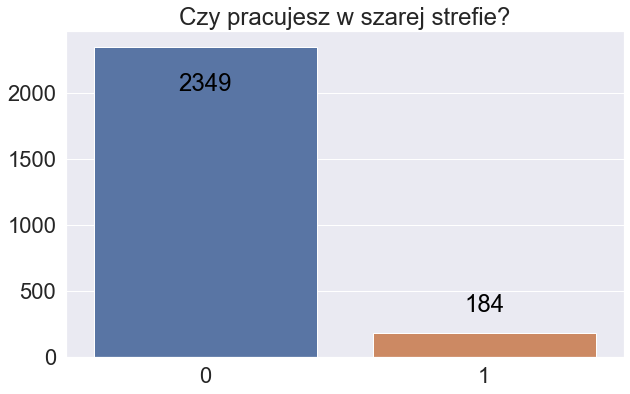

In [6]:
fig = plt.figure(figsize = (10, 6))
sns.set(font_scale = 2)
ax = sns.countplot(x = "Y", data = Ludnosc_df)
ax.annotate(f'\n{ax.patches[0].get_height()}', (ax.patches[0].get_x()+0.4, ax.patches[0].get_height()), ha='center', va='top', color='black', size=24)
ax.annotate(f'\n{ax.patches[1].get_height()}', (ax.patches[1].get_x()+0.4, ax.patches[1].get_height()+500), ha='center', va='top', color='black', size=24)
ax.set(title = "Czy pracujesz w szarej strefie?", xlabel = "", ylabel = "")

Jak widać jedynie 5% respondentów odpowiedziało na pytanie twierdząco, jest to stosunkowo mały odsetek osób.

In [7]:
Ludnosc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Columns: 903 entries, respid to Y
dtypes: category(863), float64(19), int32(1), object(20)
memory usage: 3.4+ MB


Pozbywam się kolumn, które zawierają nieistotne informacje/ewentualnie tworzę nowe zmienne bazujące na odpowiedziach innych osób.

# Pomysł - przeliczyć korelacje pomiędzy oddzielnymi częściami kwestionariusza

### Część P kwestionariusza - PRACUJĄCY NA WŁASNY RACHUNEK


### Zmienna p1 - korelacja

In [8]:
p1_df = pd.get_dummies(Ludnosc_df[['p1', 'Y']])

In [9]:
p1_df[p1_df["Y"] == 1]

,Y,p1_nie,p1_tak
14,1,1,0
15,1,1,0
24,1,0,1
32,1,1,0
41,1,1,0
...,...,...,...
2403,1,1,0
2418,1,1,0
2424,1,1,0
2505,1,1,0


In [22]:
p1_df['Y'].corr(p1_df['p1_tak'])

-0.04594887279925017

### Pozostałe zmienne

In [11]:
### Część P
# Uwzględniamy: "p1" - czy prowadzi samodzielną działalność gosp
Ludnosc_df.drop(Ludnosc_df.loc[:, "p2_pkd1":"p4"],axis = 1, inplace = True)
Ludnosc_df.drop(Ludnosc_df.loc[:, "p7_1":"p7_4"],axis = 1, inplace = True)
Ludnosc_df.drop(Ludnosc_df.loc[:, "p10a_01":"p13"],axis = 1, inplace = True)

In [12]:
ludnosc_P = Ludnosc_df[["Y", "p1","p1_typ", "p1_nrol", "p5", "p6", "p6_1", "p8", "p9", "p9_1", "p9_2", "p14"]]

In [13]:
ludnosc_P_answ = ludnosc_P[ludnosc_P["p1"] == "tak"]
ludnosc_P_answ["Y"].value_counts()

0    335
1     15
Name: Y, dtype: int64

In [14]:
ludnosc_P_answ["p6_1"] = pd.to_numeric(ludnosc_P_answ["p6_1"])

C:\Users\mateu\AppData\Local\Temp/ipykernel_21708/995047042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ludnosc_P_answ["p6_1"] = pd.to_numeric(ludnosc_P_answ["p6_1"])


In [15]:
ludnosc_P_answ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 8 to 2521
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Y        350 non-null    int32   
 1   p1       350 non-null    category
 2   p1_typ   348 non-null    category
 3   p1_nrol  350 non-null    category
 4   p5       350 non-null    category
 5   p6       350 non-null    category
 6   p6_1     348 non-null    float64 
 7   p8       348 non-null    category
 8   p9       344 non-null    category
 9   p9_1     323 non-null    category
 10  p9_2     296 non-null    category
 11  p14      350 non-null    category
dtypes: category(10), float64(1), int32(1)
memory usage: 11.9 KB


W badanej części jest również bardzo mały odsetek osób pracujących w szarej strefie ~5%

Tworzymy dummy variables

In [16]:
dummied_P_df = pd.get_dummies(ludnosc_P_answ)

In [17]:
correlations = dummied_P_df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'Y'") # Filter by variable
# output of this code will give correlation of column v2 with all the other columns 

,col1,col2,correlation
0,Y,Y,1.000000
239,Y,p14_trochę się zwiększyły,0.078309
258,Y,p9_2_znacznie się zwiększą,0.070535
262,Y,p1_typ_rolnicza,0.069474
276,Y,p1_nrol_nie,0.066943
328,Y,p9_1_wzrośnie,0.044563
344,Y,p8_raczej odpowiada,0.039535
361,Y,p9_2_trochę się zmniejszą,0.033337
380,Y,p14_trochę się zmniejszyły,0.028672
401,Y,p5_od różnych zleceniodawców (odbiorców),0.021149


Kolumny uwzględnione w dalszej analizie

- p14 - Czy Pana obroty w firmie się zmniejszyły/zwiększyły? (12m wstecz)
- p9_2 - Czy Pana obroty aktualnie...
- p1_typ - Czy prowadzi działalność gospodarczą

## Część Q kwestionariusza - PRACUJĄCY NA WŁASNY RACHUNEK W PRZESZŁOŚCI


In [18]:
### Część Q
Ludnosc_df.drop(Ludnosc_df.loc[:, "q1":"q8_naj"],axis = 1, inplace = True)


### Uwzględnione kolumny:
# BRAK

## Część E kwestionariusza - ZATRUDNIENI ETATOWO (NA UMOWĘ O PRACĘ) 


### Zmienna e1 i jej korelacja

In [26]:
e1_df = pd.get_dummies(Ludnosc_df[['e1', 'Y']])

In [28]:
e1_df['Y'].corr(e1_df['e1_tak'])

0.005188704879203112

Występuje bardzo słaba korelacja pomiędzy zatrudnieniem etatowym, a szarą strefą w związku z czym rezygnujemy z analizy dalszych zmiennych,

## Część F kwestionariusza - ZATRUDNIENI NA UMOWĘ O PRACĘ (W PRZESZŁOŚCI)


### Zmienna f1

In [29]:
f1_df = pd.get_dummies(Ludnosc_df[['f1', 'Y']])

In [33]:
f1_df['Y'].corr(f1_df['f1_NDT'])

-0.026681091726002273

Korelacja ponownie nie wyszła wystarczająco wysoka, aby wziąć pod uwagę 

## Część C kwestionariusza - Pomagający członkowie rodziny

### Zmienna C1

In [39]:
f1_df = pd.get_dummies(Ludnosc_df[['c1', 'c2', 'Y']])

In [40]:
f1_df.corr()

,Y,c1_nie,c1_tak,c2_NDT,c2_nadal wykonuje,c2_została tymczasowo przerwana,c2_została zakończona
Y,1.000000,-0.113064,0.113614,-0.113614,0.061107,0.077296,0.071712
c1_nie,-0.113064,1.000000,-0.997891,0.997891,-0.799420,-0.330915,-0.439875
c1_tak,0.113614,-0.997891,1.000000,-1.000000,0.801109,0.331614,0.440805
c2_NDT,-0.113614,0.997891,-1.000000,1.000000,-0.801109,-0.331614,-0.440805
c2_nadal wykonuje,0.061107,-0.799420,0.801109,-0.801109,1.000000,-0.030910,-0.041087
c2_została tymczasowo przerwana,0.077296,-0.330915,0.331614,-0.331614,-0.030910,1.000000,-0.017008
c2_została zakończona,0.071712,-0.439875,0.440805,-0.440805,-0.041087,-0.017008,1.000000


Zauważalne jest bardzo duże skorelowanie zmiennej określającej pomaganie rodzinie z uczestnictwem w szarej strefie. Bardzo często terminy te są ze sobą powiązane. Pytanie odnośnie zakończenia pomagania rodzinie również wpływa na uczestnictwo w szarej strefie.

Uwzględnione zmienne w dalszej analizie:
- "c1" - Czy w ciągu ostatnich 12 miesięcy pomagał(a) Pan(i)nieodpłatnie w rodzinnej działalności gospodarczej lub rolniczej?
- "c2" - Czy tę pracę Pan(i) nadal wykonuje, czy została ona już zakończona bądź tymczasowo przerwana?

## Część X kwestionariusza - Staże, praktyki

### Zmienna X1

In [41]:
x1_df = pd.get_dummies(Ludnosc_df[['x1', 'Y']])

In [42]:
x1_df.corr()

,Y,x1_nie,x1_tak
Y,1.000000,0.008218,-0.007584
x1_nie,0.008218,1.000000,-0.992308
x1_tak,-0.007584,-0.992308,1.000000


Pytanie odnośnie praktyk nie jest w ogóle skorelowane z występowaniem szarej strefy. Pomijamy te cechy w dalszej analizie

## Część V kwestionariusza - Wolontariat

In [45]:
v1_df = pd.get_dummies(Ludnosc_df[['v1_1', 'v1_2', 'v1_3', 'v1_4', 'v1_5', 'v1_6','Y']])

In [46]:
v1_df.corr()

,Y,v1_1_brak danych,v1_1_nie,v1_1_tak,v1_2_brak danych,v1_2_nie,v1_2_tak,v1_3_brak danych,v1_3_nie,v1_3_tak,v1_4_brak danych,v1_4_nie,v1_4_tak,v1_5_brak danych,v1_5_nie,v1_5_tak,v1_6_brak danych,v1_6_nie,v1_6_tak
Y,1.000000,-0.005562,-0.033464,0.034040,-0.005562,-0.036252,0.036730,-0.005562,-0.052006,0.052589,-0.005562,0.014239,-0.013411,-0.005562,-0.039067,0.039530,-0.005562,-0.121223,0.121531
v1_1_brak danych,-0.005562,1.000000,-0.079493,-0.004951,1.000000,-0.065756,-0.005991,1.000000,-0.073860,-0.005330,1.000000,-0.191459,-0.002024,1.000000,-0.063036,-0.006250,1.000000,-0.033072,-0.011930
v1_1_nie,-0.033464,-0.079493,1.000000,-0.996430,-0.079493,0.184970,-0.179653,-0.079493,0.153415,-0.147521,-0.079493,0.137437,-0.124360,-0.079493,0.330753,-0.325888,-0.079493,0.252616,-0.249158
v1_1_tak,0.034040,-0.004951,-0.996430,1.000000,-0.004951,-0.179986,0.180729,-0.004951,-0.147644,0.148439,-0.004951,-0.121656,0.124924,-0.004951,-0.326461,0.327448,-0.004951,-0.250614,0.250956
v1_2_brak danych,-0.005562,1.000000,-0.079493,-0.004951,1.000000,-0.065756,-0.005991,1.000000,-0.073860,-0.005330,1.000000,-0.191459,-0.002024,1.000000,-0.063036,-0.006250,1.000000,-0.033072,-0.011930
v1_2_nie,-0.036252,-0.065756,0.184970,-0.179986,-0.065756,1.000000,-0.997424,-0.065756,0.197094,-0.192410,-0.065756,0.135215,-0.124804,-0.065756,0.272596,-0.268569,-0.065756,0.251079,-0.248238
v1_2_tak,0.036730,-0.005991,-0.179653,0.180729,-0.005991,-0.997424,1.000000,-0.005991,-0.192208,0.193207,-0.005991,-0.121743,0.125218,-0.005991,-0.268650,0.269596,-0.005991,-0.249242,0.249630
v1_3_brak danych,-0.005562,1.000000,-0.079493,-0.004951,1.000000,-0.065756,-0.005991,1.000000,-0.073860,-0.005330,1.000000,-0.191459,-0.002024,1.000000,-0.063036,-0.006250,1.000000,-0.033072,-0.011930
v1_3_nie,-0.052006,-0.073860,0.153415,-0.147644,-0.073860,0.197094,-0.192208,-0.073860,1.000000,-0.996861,-0.073860,0.140617,-0.128710,-0.073860,0.249882,-0.245249,-0.073860,0.230357,-0.227141
v1_3_tak,0.052589,-0.005330,-0.147521,0.148439,-0.005330,-0.192410,0.193207,-0.005330,-0.996861,1.000000,-0.005330,-0.125800,0.129221,-0.005330,-0.245559,0.246413,-0.005330,-0.228359,0.228707


Również i w tej kategorii potwierdzona została teoria odnośnie wpadnia w zasięg szarej strefy osób pomagającym rodzinie. W pozostałych przypadkach nie została zauważona większa korelacja ze zmienną objaśnianą.

- Uwzględniamy zmienną v1_6

## Część Y kwestionariusza - praca za granicą

### Zmienna y1

In [49]:
y1_df = pd.get_dummies(Ludnosc_df[['y1','Y']])

In [50]:
y1_df.corr()

,Y,y1_nie,y1_tak
Y,1.000000,-0.075122,0.076048
y1_nie,-0.075122,1.000000,-0.994833
y1_tak,0.076048,-0.994833,1.000000


Zauważalne jest drobne powiązanie pomiędzy pracą za granicą, a występowaniem w szarej strefie. Kontynuujemy analizę niniejszej części kwestionariusza.

In [51]:
y1_df.value_counts()

Y  y1_nie  y1_tak
0  1       0         2265
1  1       0          167
0  0       1           83
1  0       1           17
0  0       0            1
dtype: int64

### Pozostałe zmienne y

In [52]:
y1_rest = pd.get_dummies(Ludnosc_df[['Y', 'y1_1', 'y2']])

In [53]:
y1_rest.corr()

,Y,y1_1_1-3 miesiące,y1_1_4-6 miesięcy,y1_1_krócej niż miesiąc,y1_1_odmowa odpowiedzi,y1_1_powyżej 6 miesięcy,y1_1_wcale nie pracował,y2_odmowa odpowiedzi,y2_raczej nie,y2_raczej tak,y2_trudno powiedzieć,y2_zdecydowanie nie,y2_zdecydowanie tak
Y,1.000000,0.063813,0.030893,0.065573,0.071007,0.014728,-0.075122,-0.007867,0.054224,0.115006,0.020922,-0.119227,0.055254
y1_1_1-3 miesiące,0.063813,1.000000,-0.005473,-0.004893,-0.001728,-0.013771,-0.426595,-0.002444,0.035955,0.270800,-0.012952,-0.151309,0.046036
y1_1_4-6 miesięcy,0.030893,-0.005473,1.000000,-0.003544,-0.001251,-0.009972,-0.308932,-0.001770,-0.023897,0.068087,0.033817,-0.078889,0.154376
y1_1_krócej niż miesiąc,0.065573,-0.004893,-0.003544,1.000000,-0.001119,-0.008916,-0.276207,-0.001582,-0.021366,0.078413,-0.008386,-0.042355,0.082949
y1_1_odmowa odpowiedzi,0.071007,-0.001728,-0.001251,-0.001119,1.000000,-0.003148,-0.097519,-0.000559,-0.007544,-0.003276,0.133394,-0.039825,-0.003122
y1_1_powyżej 6 miesięcy,0.014728,-0.013771,-0.009972,-0.008916,-0.003148,1.000000,-0.777286,-0.004453,-0.006223,0.085337,0.011460,-0.227903,0.508408
y1_1_wcale nie pracował,-0.075122,-0.426595,-0.308932,-0.276207,-0.097519,-0.777286,1.000000,0.005729,0.004377,-0.230454,-0.025015,0.292227,-0.494445
y2_odmowa odpowiedzi,-0.007867,-0.002444,-0.001770,-0.001582,-0.000559,-0.004453,0.005729,1.000000,-0.010670,-0.004634,-0.004188,-0.056332,-0.004416
y2_raczej nie,0.054224,0.035955,-0.023897,-0.021366,-0.007544,-0.006223,0.004377,-0.010670,1.000000,-0.062567,-0.056551,-0.760667,-0.059628
y2_raczej tak,0.115006,0.270800,0.068087,0.078413,-0.003276,0.085337,-0.230454,-0.004634,-0.062567,1.000000,-0.024557,-0.330316,-0.025893


Zauważalne jest powiązanie pomiędzy niektórymi odpowiedziami z podkwestionariusza. W związku z czym w dalszej analizie uwzględniono zmienne:
- "y1" - Czy w minionych 12 miesiącach pracował(a) Pan(i) zarobkowo za granicą?
- "y1_1" - Ile miesięcy Pan(i) pracował(a)? 
- "y2" - A czy w najbliższych 12 miesiącach zamierza Pan(i) pracować zarobkowo za granicą? 

## Część G kwestionariusza - Podsumowanie sytuacji zawodowej

### Zmienne g1, g2, g3, g5, , g8, 

In [54]:
Ludnosc_df.head(1)

,respid,intid,idR1,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rok,woj,region,miejsce,miejsce_4k,woj_operat,region_operat,miejsce_operat,m1,wiek,wiek_10k,wiek_6k,wiek_4k,wiek_3k,m2,prace,praceteraz,BAEL_bezro,BAEL_praca,BAEL_aktyw,BAEL_sytzaw,BAEL_sytzaw2,bezrej,wykszt,wykszt_7k,wykszt_4k,wykszt_3k,matura,wyzsze,najwyzsze,uczy,uczy_gdzie,p1,p1_typ,p1_nrol,p5,p6,p6_1,p8,p9,p9_1,p9_2,p14,q9,e1,e1_3m,ee1,ee2L,ee2M,f1,f2,f3,f4_01,f4_02,f4_03,f4_04,f4_05,f4_06,f4_07,f4_08,f4_09,f4_10,f4_11,f4_12,f4_13,f4_14,f4_15,f4_16,f4_15it,f4_15i,f5_isco,f5_isco_d,f6,f7,u1,u2,u3,u3_5k,u3_1,u3_1x,u3_2,u4_1,u4_2,u4_3,u5_isco,u5_isco_d,u6,u7,u8,n1,n2_dni,n2_mies,n3_01,n3_02,n3_03,n3_04,n4_01,n4_02,n4_03,n4_04,n4_05,n4_06,n4_07,n4_08,n4_09,n4_10,n4_11,n4_12,n5,n6,n7,n8_01,n8_02,n8_03,n8_04,n8_05,n8_06,n8_07,n8_08,n8_09,n8_10,n8_11,n9,n10,n11,n12,n12_1,n13,n14,c1,c2,x1,x2,x3,x4,x5,v1_1,v1_2,v1_3,v1_4,v1_5,v1_6,v2,volont,y1,y1_1,y1_2,y2,g1,g1_1,g1_2,g1_3,g1_4ile,g1_4ile_8k,g1_4mies,g1_4lat,g2,g2_1,g2_2,g2_3,g2_4,g3,g3_1,g3_1_1_isco,g3_2,g4,g5,g6_1,g6_2,g7,g8,g8x,g8_isco,g9_pkd1,g9_pkd2,g9_pkd3,j1_01,j1_02,j1_03,j1_04,j1_05,j1_06,j1_07,j1_08,j1_09,j1_10,j2,j2i_isco,j2i_isco_d,j3_01,j3_02,j3_03,j3_04,j3_05,j3_06,j3_07,j3_08,j3_09,j3_10,j3_11,j3_12,j3_13,j4,j5,j5_plec,j5_1,j5_2,j5_3,j5_4,j6,j6_1,j7_1,j7_2,j7_3,j7_4,j7_5,j7_6,j7_7,j7_8,j8,j9_01,j9_02,j9_03,j9_04,s1s2,s1s2_ile,s1s2_ile_6k,s1,s1_1_1,s1_1_2,s1_2mies,s1_2lat,s1_3,s1_4_isco,s2,s2_1,s2_2_1,s2_2_2,s2_3,s2_3mies,s2_3lat,s2_3dlug,s2_4,s2_5_isco,s2_5_isco_d1,s2_5_isco_d2,s3_ile,s3_01,s3_02,s3_03,s3_04,s3_05,s3_06,s3_07,s3_08,s3_09,s3_10,s4_1,s4_2,s4_3,s4_4,s4_5,s4_6,s5,s6_1,s6_2,s6_3,s7,s8,s9_1,s9_2,s9_3,s9_4,s9_5,s10,s11,s12_01,s12_02,s12_03,s12_04,s12_05,s12_06,s12_07,s12_08,s12_09,s12_10,s12_11,s12_12,o1_1,o1_2,o1_3,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,k21,k22,k23,k24,k25,w1,w2,w3,w3G,w3G_2,w3LO,w3LO_2,w3LO_3,w3Z,w3Z_2,w3Z_4_isco,w3Z_4_isco_d,w3T,w3T_2,w3T_3,w3T_4_isco,w3T_4_isco_d,w3LZ,w3LZ_2,w3LZ_3,w3LZ_4_isco,w3LZ_4_isco_d,w3SP,w3SP_2,w3IN,w3IN_2,w4,w4_1,w5_1_lic,w5_2_inz,w5_3_mgr,w5_4_mgrinz,w5_5_pdp,w5_6_mba,w5_7_dr,isced3a,isced2a,isced1a,isced3b,isced2b,isced1b,w5_1_1t,w5_1_1x,w5_1_1,isced2_1,isced1_1,w5_2_1,w5_3_1,w5_4_1,w5_5_1,w5_6_1,w5_6_uk1,w5_6_abs1,w5_7_1,w5_1_2t,w5_1_2x,w5_1_2,isced2_2,isced1_2,w5_2_2,w5_3_2,w5_4_2,w5_5_2,w5_6_2,w5_7_2,w5_6_uk2,w5_6_abs2,w5_1_3t,w5_1_3x,w5_1_3,isced2_3,isced1_3,w5_2_3,w5_3_3,w5_4_3,w5_5_3,w5_6_3,w5_7_3,w5_6_uk3,w5_6_abs3,w5_1_4t,w5_1_4x,w5_1_4,isced2_4,isced1_4,w5_2_4,w5_3_4,w5_4_4,w5_5_4,w5_6_4,w5_7_4,w5_6_uk4,w5_6_abs4,w5_1_5t,w5_1_5x,w5_1_5,isced2_5,isced1_5,w5_2_5,w5_3_5,w5_4_5,w5_5_5,w5_6_5,w5_7_5,w5_6_uk5,w5_6_abs5,w5_1_6t,w5_1_6x,w5_1_6,isced2_6,isced1_6,w5_2_6,w5_3_6,w5_4_6,w5_5_6,w5_6_6,w5_7_6,w5_6_uk6,w5_6_abs6,w6,w6_1,isced1_w6,w6_2t1,w6_2_1x,w6_2_1,w6_2t2,w6_2_2x,w6_2_2,w6_2t3,w6_2_3x,w6_2_3,isced2_w6_2_1,isced2_w6_2_2,isced2_w6_2_3,isced1_w6_2_1,isced1_w6_2_2,isced1_w6_2_3,w7_01,w7_02,w7_03,w7_04,w7_05,w7_06,w7_07,w7_08,w7_09,w7_10,w7_11,w7_12,w7_1_01,w7_1_02,w7_1_03,w7_1_04,w7_1_05,w7_1_06,w7_1_07,w7_1_08,w7_1_09,w7_1_10,w7_1_11,w7_1_12,w8,w9,w9_1,w9_1p,w9_2,w9_2p,w9_3,w9_3p,w9_4,w9_4p,w9_5,w9_5p,w10,d1_12_1,d1_12_2,d1_12_3,d1_12_4,d1_12_5,d1_12_6,d1_12_7,d1_12_8,d1_4_1,d1_4_2,d1_4_3,d1_4_4,d1_4_5,d1_4_6,d1_4_7,d2_1,d2_2,d2_3,d2_3it,d2_3i,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d4_12_1,d4_12_2,d4_12_3,d4_12_4,d4_12_5,d4_12_6,d4_12_7,d4_4_1,d4_4_2,d4_4_3,d4_4_4,d4_4_5,d4_4_6,d4_4_7,d5,d6,d7_12_1,d7_12_2,d7_12_3,d7_12_4,d7_12_5,d7_12_6,d7_4_1,d7_4_2,d7_4_3,d7_4_4,d7_4_5,d7_4_6,d8_01,d8_02,d8_03,d8_04,d8_05,d8_06,d8_07,d8_08,d8_09,d8_10,d8_11,d8_12,d8_13,d8_11it,d8_11i,d9,d10_01,d10_02,d10_03,d10_04,d10_05,d10_06,d10_07,d10_08,d10_09,d10_10,d10_11,d10_12,d11,d11_A1,d11_A,d11_B1,d11_B,d11_C1,d11_C,d11_D1,d11_D,d11_BE,d11_C1E,d11_CE,d11_D1E,d11_DE,d12_1,d12_2,d12_3,d12_4,d13,z1,z2,z3,z4,z4_1,z4_2,m3_1,m3_2,m3_3,m3_4,m3_5,m3_6,m3_7,m3_8,m3_9,m4_1,m4_2,m5,m5_3k,m5_1_1,m5_1_2,m5_1_3,m5_1_4,m5_1_5,m5_

In [60]:
g_df = pd.get_dummies(Ludnosc_df[['g1', 'g2', 'g5', 'Y']])

In [61]:
g_df.corr()

,Y,"g1_ma pracę zarobkową i ją wykonuje (wliczając w to staże i praktyki zawodowe, a także pracę bez formalnej umowy)",g1_nie ma pracy lub ma przerwę w pracy dłuższą niż 3 miesiące,g2_nie,g2_tak,g5_nie,g5_odmowa odpowiedzi,g5_tak,g5_trudno powiedzieć
Y,1.000000,0.078454,-0.078241,0.031574,-0.031574,-0.079685,-0.007867,0.010495,-0.044912
"g1_ma pracę zarobkową i ją wykonuje (wliczając w to staże i praktyki zawodowe, a także pracę bez formalnej umowy)",0.078454,1.000000,-0.999168,-0.459418,0.459418,0.000416,-0.006552,0.234479,0.148883
g1_nie ma pracy lub ma przerwę w pracy dłuższą niż 3 miesiące,-0.078241,-0.999168,1.000000,0.458481,-0.458481,-0.002106,0.006576,-0.234142,-0.148657
g2_nie,0.031574,-0.459418,0.458481,1.000000,-1.000000,-0.047087,0.035505,-0.225044,-0.131132
g2_tak,-0.031574,0.459418,-0.458481,-1.000000,1.000000,0.047087,-0.035505,0.225044,0.131132
g5_nie,-0.079685,0.000416,-0.002106,-0.047087,0.047087,1.000000,-0.013487,-0.225716,-0.150173
g5_odmowa odpowiedzi,-0.007867,-0.006552,0.006576,0.035505,-0.035505,-0.013487,1.000000,-0.013224,-0.008798
g5_tak,0.010495,0.234479,-0.234142,-0.225044,0.225044,-0.225716,-0.013224,1.000000,-0.147242
g5_trudno powiedzieć,-0.044912,0.148883,-0.148657,-0.131132,0.131132,-0.150173,-0.008798,-0.147242,1.000000


Żadna z powyższych zmiennych nie wydaje się na tyle istotna, aby mogła wpłynąć na pytanie o szarą strefę. 

Jedyna zmienna warta uwzględnienia:
- "g1" - Zatem podsumowując Pana(-i) obecną sytuację zawodową, w tym momencie...

## Część J kwestionariusza - JAKOŚĆ PRACY, POSTAWY WOBEC PRACY

In [63]:
j_df = pd.get_dummies(Ludnosc_df[['j1_01', 'j1_02', 'Y']])

In [64]:
j_df.corr()

,Y,"j1_01_ani niezadowolony, ani zadowolony",j1_01_bardzo niezadowolony,j1_01_bardzo zadowolony,j1_01_raczej niezadowolony,j1_01_raczej zadowolony,"j1_02_ani niezadowolony, ani zadowolony",j1_02_bardzo niezadowolony,j1_02_bardzo zadowolony,j1_02_raczej niezadowolony,j1_02_raczej zadowolony
Y,1.000000,0.007813,0.032737,0.045170,0.012578,0.036088,0.052126,0.066408,-0.017855,0.033547,0.008847
"j1_01_ani niezadowolony, ani zadowolony",0.007813,1.000000,-0.067608,-0.098125,-0.118994,-0.258042,0.160516,0.064776,-0.033079,0.171779,0.018374
j1_01_bardzo niezadowolony,0.032737,-0.067608,1.000000,-0.043677,-0.052966,-0.114859,-0.007474,0.191908,-0.005944,0.063253,-0.012762
j1_01_bardzo zadowolony,0.045170,-0.098125,-0.043677,1.000000,-0.076874,-0.166704,0.005132,0.011265,0.353785,-0.037032,0.092708
j1_01_raczej niezadowolony,0.012578,-0.118994,-0.052966,-0.076874,1.000000,-0.202159,0.081725,0.100369,-0.032864,0.214309,-0.046191
j1_01_raczej zadowolony,0.036088,-0.258042,-0.114859,-0.166704,-0.202159,1.000000,0.207931,-0.003479,0.021069,0.028678,0.343670
"j1_02_ani niezadowolony, ani zadowolony",0.052126,0.160516,-0.007474,0.005132,0.081725,0.207931,1.000000,-0.095035,-0.082216,-0.151744,-0.195370
j1_02_bardzo niezadowolony,0.066408,0.064776,0.191908,0.011265,0.100369,-0.003479,-0.095035,1.000000,-0.039648,-0.073177,-0.094216
j1_02_bardzo zadowolony,-0.017855,-0.033079,-0.005944,0.353785,-0.032864,0.021069,-0.082216,-0.039648,1.000000,-0.063306,-0.081507
j1_02_raczej niezadowolony,0.033547,0.171779,0.063253,-0.037032,0.214309,0.028678,-0.151744,-0.073177,-0.063306,1.000000,-0.150435


 Brak podstaw do uwzględnienia powyższych kwestii przy odniesieniu do szarej strefy.

## Część S kwestionariusza - Poszukiwanie pracy

### Zmienna s1, s9,  s10

In [69]:
Ludnosc_df.head(1)

,respid,intid,idR1,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rok,woj,region,miejsce,miejsce_4k,woj_operat,region_operat,miejsce_operat,m1,wiek,wiek_10k,wiek_6k,wiek_4k,wiek_3k,m2,prace,praceteraz,BAEL_bezro,BAEL_praca,BAEL_aktyw,BAEL_sytzaw,BAEL_sytzaw2,bezrej,wykszt,wykszt_7k,wykszt_4k,wykszt_3k,matura,wyzsze,najwyzsze,uczy,uczy_gdzie,p1,p1_typ,p1_nrol,p5,p6,p6_1,p8,p9,p9_1,p9_2,p14,q9,e1,e1_3m,ee1,ee2L,ee2M,f1,f2,f3,f4_01,f4_02,f4_03,f4_04,f4_05,f4_06,f4_07,f4_08,f4_09,f4_10,f4_11,f4_12,f4_13,f4_14,f4_15,f4_16,f4_15it,f4_15i,f5_isco,f5_isco_d,f6,f7,u1,u2,u3,u3_5k,u3_1,u3_1x,u3_2,u4_1,u4_2,u4_3,u5_isco,u5_isco_d,u6,u7,u8,n1,n2_dni,n2_mies,n3_01,n3_02,n3_03,n3_04,n4_01,n4_02,n4_03,n4_04,n4_05,n4_06,n4_07,n4_08,n4_09,n4_10,n4_11,n4_12,n5,n6,n7,n8_01,n8_02,n8_03,n8_04,n8_05,n8_06,n8_07,n8_08,n8_09,n8_10,n8_11,n9,n10,n11,n12,n12_1,n13,n14,c1,c2,x1,x2,x3,x4,x5,v1_1,v1_2,v1_3,v1_4,v1_5,v1_6,v2,volont,y1,y1_1,y1_2,y2,g1,g1_1,g1_2,g1_3,g1_4ile,g1_4ile_8k,g1_4mies,g1_4lat,g2,g2_1,g2_2,g2_3,g2_4,g3,g3_1,g3_1_1_isco,g3_2,g4,g5,g6_1,g6_2,g7,g8,g8x,g8_isco,g9_pkd1,g9_pkd2,g9_pkd3,j1_01,j1_02,j1_03,j1_04,j1_05,j1_06,j1_07,j1_08,j1_09,j1_10,j2,j2i_isco,j2i_isco_d,j3_01,j3_02,j3_03,j3_04,j3_05,j3_06,j3_07,j3_08,j3_09,j3_10,j3_11,j3_12,j3_13,j4,j5,j5_plec,j5_1,j5_2,j5_3,j5_4,j6,j6_1,j7_1,j7_2,j7_3,j7_4,j7_5,j7_6,j7_7,j7_8,j8,j9_01,j9_02,j9_03,j9_04,s1s2,s1s2_ile,s1s2_ile_6k,s1,s1_1_1,s1_1_2,s1_2mies,s1_2lat,s1_3,s1_4_isco,s2,s2_1,s2_2_1,s2_2_2,s2_3,s2_3mies,s2_3lat,s2_3dlug,s2_4,s2_5_isco,s2_5_isco_d1,s2_5_isco_d2,s3_ile,s3_01,s3_02,s3_03,s3_04,s3_05,s3_06,s3_07,s3_08,s3_09,s3_10,s4_1,s4_2,s4_3,s4_4,s4_5,s4_6,s5,s6_1,s6_2,s6_3,s7,s8,s9_1,s9_2,s9_3,s9_4,s9_5,s10,s11,s12_01,s12_02,s12_03,s12_04,s12_05,s12_06,s12_07,s12_08,s12_09,s12_10,s12_11,s12_12,o1_1,o1_2,o1_3,k01,k02,k03,k04,k05,k06,k07,k08,k09,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20,k21,k22,k23,k24,k25,w1,w2,w3,w3G,w3G_2,w3LO,w3LO_2,w3LO_3,w3Z,w3Z_2,w3Z_4_isco,w3Z_4_isco_d,w3T,w3T_2,w3T_3,w3T_4_isco,w3T_4_isco_d,w3LZ,w3LZ_2,w3LZ_3,w3LZ_4_isco,w3LZ_4_isco_d,w3SP,w3SP_2,w3IN,w3IN_2,w4,w4_1,w5_1_lic,w5_2_inz,w5_3_mgr,w5_4_mgrinz,w5_5_pdp,w5_6_mba,w5_7_dr,isced3a,isced2a,isced1a,isced3b,isced2b,isced1b,w5_1_1t,w5_1_1x,w5_1_1,isced2_1,isced1_1,w5_2_1,w5_3_1,w5_4_1,w5_5_1,w5_6_1,w5_6_uk1,w5_6_abs1,w5_7_1,w5_1_2t,w5_1_2x,w5_1_2,isced2_2,isced1_2,w5_2_2,w5_3_2,w5_4_2,w5_5_2,w5_6_2,w5_7_2,w5_6_uk2,w5_6_abs2,w5_1_3t,w5_1_3x,w5_1_3,isced2_3,isced1_3,w5_2_3,w5_3_3,w5_4_3,w5_5_3,w5_6_3,w5_7_3,w5_6_uk3,w5_6_abs3,w5_1_4t,w5_1_4x,w5_1_4,isced2_4,isced1_4,w5_2_4,w5_3_4,w5_4_4,w5_5_4,w5_6_4,w5_7_4,w5_6_uk4,w5_6_abs4,w5_1_5t,w5_1_5x,w5_1_5,isced2_5,isced1_5,w5_2_5,w5_3_5,w5_4_5,w5_5_5,w5_6_5,w5_7_5,w5_6_uk5,w5_6_abs5,w5_1_6t,w5_1_6x,w5_1_6,isced2_6,isced1_6,w5_2_6,w5_3_6,w5_4_6,w5_5_6,w5_6_6,w5_7_6,w5_6_uk6,w5_6_abs6,w6,w6_1,isced1_w6,w6_2t1,w6_2_1x,w6_2_1,w6_2t2,w6_2_2x,w6_2_2,w6_2t3,w6_2_3x,w6_2_3,isced2_w6_2_1,isced2_w6_2_2,isced2_w6_2_3,isced1_w6_2_1,isced1_w6_2_2,isced1_w6_2_3,w7_01,w7_02,w7_03,w7_04,w7_05,w7_06,w7_07,w7_08,w7_09,w7_10,w7_11,w7_12,w7_1_01,w7_1_02,w7_1_03,w7_1_04,w7_1_05,w7_1_06,w7_1_07,w7_1_08,w7_1_09,w7_1_10,w7_1_11,w7_1_12,w8,w9,w9_1,w9_1p,w9_2,w9_2p,w9_3,w9_3p,w9_4,w9_4p,w9_5,w9_5p,w10,d1_12_1,d1_12_2,d1_12_3,d1_12_4,d1_12_5,d1_12_6,d1_12_7,d1_12_8,d1_4_1,d1_4_2,d1_4_3,d1_4_4,d1_4_5,d1_4_6,d1_4_7,d2_1,d2_2,d2_3,d2_3it,d2_3i,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d4_12_1,d4_12_2,d4_12_3,d4_12_4,d4_12_5,d4_12_6,d4_12_7,d4_4_1,d4_4_2,d4_4_3,d4_4_4,d4_4_5,d4_4_6,d4_4_7,d5,d6,d7_12_1,d7_12_2,d7_12_3,d7_12_4,d7_12_5,d7_12_6,d7_4_1,d7_4_2,d7_4_3,d7_4_4,d7_4_5,d7_4_6,d8_01,d8_02,d8_03,d8_04,d8_05,d8_06,d8_07,d8_08,d8_09,d8_10,d8_11,d8_12,d8_13,d8_11it,d8_11i,d9,d10_01,d10_02,d10_03,d10_04,d10_05,d10_06,d10_07,d10_08,d10_09,d10_10,d10_11,d10_12,d11,d11_A1,d11_A,d11_B1,d11_B,d11_C1,d11_C,d11_D1,d11_D,d11_BE,d11_C1E,d11_CE,d11_D1E,d11_DE,d12_1,d12_2,d12_3,d12_4,d13,z1,z2,z3,z4,z4_1,z4_2,m3_1,m3_2,m3_3,m3_4,m3_5,m3_6,m3_7,m3_8,m3_9,m4_1,m4_2,m5,m5_3k,m5_1_1,m5_1_2,m5_1_3,m5_1_4,m5_1_5,m5_

In [81]:
s_df = pd.get_dummies(Ludnosc_df[['w9', 'w4','w10', 'Y']])

In [82]:
s_df.corr()

,Y,w9_nie,w9_tak,w4_nie,w4_tak,w10_-7.0,w10_codziennie,w10_kilka razy w miesiącu,w10_kilka razy w tygodniu,w10_nie korzysta z internetu,w10_rzadziej niż kilka razy w miesiącu
Y,1.000000,-0.021953,0.021953,0.003718,0.005696,-0.009638,0.039998,-0.018642,-0.010279,-0.046529,0.044286
w9_nie,-0.021953,1.000000,-1.000000,-0.101369,-0.331903,0.030943,-0.345180,0.070772,0.056563,0.332152,0.049013
w9_tak,0.021953,-1.000000,1.000000,0.101369,0.331903,-0.030943,0.345180,-0.070772,-0.056563,-0.332152,-0.049013
w4_nie,0.003718,-0.101369,0.101369,1.000000,-0.335880,-0.016992,0.034940,0.005197,0.084863,-0.108208,-0.035149
w4_tak,0.005696,-0.331903,0.331903,-0.335880,1.000000,0.025913,0.403852,-0.104889,-0.159203,-0.298250,-0.064516
w10_-7.0,-0.009638,0.030943,-0.030943,-0.016992,0.025913,1.000000,-0.046265,-0.007054,-0.013094,-0.015658,-0.004578
w10_codziennie,0.039998,-0.345180,0.345180,0.034940,0.403852,-0.046265,1.000000,-0.275206,-0.510898,-0.610926,-0.178634
w10_kilka razy w miesiącu,-0.018642,0.070772,-0.070772,0.005197,-0.104889,-0.007054,-0.275206,1.000000,-0.077892,-0.093142,-0.027235
w10_kilka razy w tygodniu,-0.010279,0.056563,-0.056563,0.084863,-0.159203,-0.013094,-0.510898,-0.077892,1.000000,-0.172911,-0.050559
w10_nie korzysta z internetu,-0.046529,0.332152,-0.332152,-0.108208,-0.298250,-0.015658,-0.610926,-0.093142,-0.172911,1.000000,-0.060458


Osoby, które poszukują pracy są bardziej skłonni do podjęcia pracy nieformalnej.
Uwzględnić zmienną:
- "s1" - Czy poszukuje Pan(i) jakiejś innej pracy, poza tą, którą Pan(i) obecnie wykonuje?


## Część D – DOSKONALENIE I ROZWÓJ KOMPETENCJI

In [83]:
d_df = pd.get_dummies(Ludnosc_df[['d11', 'Y']])

In [84]:
d_df.corr()

,Y,d11_jestem w trakcie wyrabiania,d11_nie,d11_tak
Y,1.000000,0.073682,0.004259,-0.017524
d11_jestem w trakcie wyrabiania,0.073682,1.000000,-0.046553,-0.134312
d11_nie,0.004259,-0.046553,1.000000,-0.983612
d11_tak,-0.017524,-0.134312,-0.983612,1.000000


## Część Z – DOSKONALENIE I ROZWÓJ KOMPETENCJI

In [85]:
z_df = pd.get_dummies(Ludnosc_df[['z1', 'z2','Y']])

In [86]:
z_df.corr()

,Y,"z1_ani dobry, ani zły",z1_bardzo dobry,z1_bardzo zły,z1_raczej dobry,z1_raczej zły,"z2_ani dobre, ani złe",z2_bardzo dobre,z2_bardzo złe,z2_odmowa odpowiedzi,z2_raczej dobre,z2_raczej złe
Y,1.000000,-0.035618,0.065615,-0.033578,0.005079,-0.037920,0.020061,-0.011833,0.016084,-0.009638,0.003662,-0.018873
"z1_ani dobry, ani zły",-0.035618,1.000000,-0.265722,-0.090136,-0.476530,-0.132177,0.220067,-0.202945,-0.027021,-0.017077,0.068272,-0.021775
z1_bardzo dobry,0.065615,-0.265722,1.000000,-0.097385,-0.514856,-0.142807,-0.165235,0.483410,-0.042720,-0.018451,-0.311365,-0.095212
z1_bardzo zły,-0.033578,-0.090136,-0.097385,1.000000,-0.174645,-0.048442,0.088412,-0.086271,0.268733,-0.006259,-0.115528,0.275673
z1_raczej dobry,0.005079,-0.476530,-0.514856,-0.174645,1.000000,-0.256102,-0.141295,-0.143249,-0.046689,-0.033088,0.271194,-0.105963
z1_raczej zły,-0.037920,-0.132177,-0.142807,-0.048442,-0.256102,1.000000,0.147242,-0.132111,0.018799,-0.009178,-0.046198,0.212831
"z2_ani dobre, ani złe",0.020061,0.220067,-0.165235,0.088412,-0.141295,0.147242,1.000000,-0.247286,-0.027767,-0.011993,-0.359024,-0.065290
z2_bardzo dobre,-0.011833,-0.202945,0.483410,-0.086271,-0.143249,-0.132111,-0.247286,1.000000,-0.056611,-0.024450,-0.731963,-0.133111
z2_bardzo złe,0.016084,-0.027021,-0.042720,0.268733,-0.046689,0.018799,-0.027767,-0.056611,1.000000,-0.002745,-0.082191,-0.014947
z2_odmowa odpowiedzi,-0.009638,-0.017077,-0.018451,-0.006259,-0.033088,-0.009178,-0.011993,-0.024450,-0.002745,1.000000,-0.035498,-0.006456


## Część M – Informacje ogólne

In [87]:
m_df = pd.get_dummies(Ludnosc_df[['m5', 'm6', 'm9_1', 'm13', 'Y']])

In [88]:
m_df.corr()

,Y,m5_rozwiedziony(-a),m5_w separacji,m5_wdowa/wdowiec,m5_wolny(-a),m5_zamężny/żonata,m5_związek nieformalny/konkubinat,m6_nie,m6_odmowa odpowiedzi,m6_tak,m9_1_0-499 zł,m9_1_1000-1499 zł,m9_1_1500-1999 zł,m9_1_2000-2499 zł,m9_1_2500-2999 zł,m9_1_3000-3499 zł,m9_1_3500-3999 zł,m9_1_4000-4999 zł,m9_1_500-999 zł,m9_1_5000-5999 zł,m9_1_6000-6999 zł,m9_1_7000-7999 zł,m9_1_8000 zł lub więcej,m13_bardzo trudne,m13_bardzo łatwe,m13_raczej trudne,m13_raczej łatwe,m13_trudne,m13_łatwe
Y,1.000000,-0.003544,-0.017620,-0.065372,0.133642,-0.105317,0.074443,0.171592,-0.019310,-0.167535,-0.015754,0.001185,0.018218,-0.009805,0.053050,-0.015042,0.018048,0.033605,0.048942,-0.016713,-0.009638,-0.013638,-0.021602,-0.001189,0.025371,-0.005892,0.014692,-0.009959,-0.014999
m5_rozwiedziony(-a),-0.003544,1.000000,-0.014702,-0.059827,-0.113936,-0.312953,-0.051851,-0.079211,0.035812,0.073124,0.050398,-0.016773,-0.023316,-0.021859,0.000509,0.009410,-0.018025,0.012751,-0.011379,0.016015,-0.008042,-0.011379,0.028445,0.119630,-0.017419,-0.016808,-0.020656,0.025394,-0.031041
m5_w separacji,-0.017620,-0.014702,1.000000,-0.016128,-0.030715,-0.084367,-0.013978,-0.036798,-0.004344,0.037257,-0.003544,-0.004522,-0.006286,-0.005893,-0.007770,-0.006656,-0.004859,-0.006286,-0.003068,0.102047,-0.002168,-0.003068,-0.004859,0.063021,-0.013854,-0.018321,-0.033584,0.042972,-0.001007
m5_wdowa/wdowiec,-0.065372,-0.059827,-0.016128,1.000000,-0.124985,-0.343303,-0.056879,-0.119581,0.006241,0.117884,-0.014420,-0.018400,-0.025577,-0.023979,-0.018107,-0.011378,-0.019773,-0.025577,-0.012483,-0.015298,-0.008822,-0.012483,-0.019773,0.127244,-0.048552,0.037907,-0.104405,0.131683,-0.053594
m5_wolny(-a),0.133642,-0.113936,-0.030715,-0.124985,1.000000,-0.653795,-0.108322,0.749622,-0.033660,-0.739843,-0.009607,0.007018,0.001960,-0.013277,0.013961,-0.003673,-0.037656,0.001960,0.038052,-0.029133,-0.016800,-0.023773,-0.024599,-0.015128,0.007185,-0.044628,0.035509,-0.028667,0.018431
m5_zamężny/żonata,-0.105317,-0.312953,-0.084367,-0.343303,-0.653795,1.000000,-0.297533,-0.558285,-0.020486,0.558139,-0.002034,0.019017,0.032844,0.034343,-0.002766,0.007996,0.057595,-0.008815,-0.014468,0.003033,0.025696,0.019418,0.003920,-0.096227,0.003329,0.021732,0.041149,-0.051790,0.024552
m5_związek nieformalny/konkubinat,0.074443,-0.051851,-0.013978,-0.056879,-0.108322,-0.297533,1.000000,0.101490,-0.015318,-0.098480,-0.012497,-0.015947,-0.022167,-0.000675,0.003296,-0.005629,-0.017137,0.034454,-0.010819,0.018098,-0.007645,0.027562,0.031499,-0.040874,0.057808,0.016818,-0.004997,-0.016378,0.001980
m6_nie,0.171592,-0.079211,-0.036798,-0.119581,0.749622,-0.558285,0.101490,1.000000,-0.040326,-0.987672,-0.000599,-0.003935,-0.003355,-0.025412,0.039687,0.007541,-0.033302,0.005812,0.027443,-0.019673,-0.020127,-0.009839,-0.021491,-0.042528,0.035433,-0.051007,0.048897,-0.066885,0.039903
m6_odmowa odpowiedzi,-0.019310,0.035812,-0.004344,0.006241,-0.033660,-0.020486,-0.015318,-0.040326,1.000000,-0.116584,-0.003883,-0.004955,-0.006888,0.055504,-0.008515,-0.007294,-0.005325,-0.006888,-0.003362,-0.004120,-0.002376,-0.003362,-0.005325,-0.017554,-0.015183,-0.008987,-0.027194,-0.022679,0.035827
m6_tak,-0.167535,0.073124,0.037257,0.117884,-0.739843,0.558139,-0.098480,-0.987672,-0.116584,1.000000,0.001204,0.004688,0.004414,0.016563,-0.038114,-0.006353,0.033936,-0.004698,-0.026751,0.020200,0.020378,0.010307,0.022196,0.045022,-0.032842,0.052109,-0.044343,0.070036,-0.045276


Okazuje się, że osoby wolne są dodatnio skorelowane z wchodzeniem do szarej strefy, a osoby zamężne są mniej skłonne do takich poświęceń. Również posiadanie dzieci zmniejsza szanse uczestnictwa w szarej strefie. Dodatkowo zauważalna jest tendencja pośród zmiennych dotyczących dochodu - osoby, które zarabiają więcej są mniej skłonne do "brania udziału w szarej strefie".

Zmienne z tej części do analizy:

- "m5"
- "m6"
- "m9_1"

# Analiza zmiennych przyjętych do analizy